# Survivalanalysis (Ereigniszeitanalyse)

Die Survivalanalysis ist eine statistische Methode, welche dazu verwendet wird, die Zeit bis einem Ereignis abzuschätzen.
Das klassische Anwendungsgebiet ist hierbei die Medizin- sowie Sozialforschung. Anwendung findet die Survivalanlysis jedoch auch in Ingenieursdiziplinen z.B. bezüglich Materialermüdung. 

Siehe auch: https://de.wikipedia.org/wiki/Ereigniszeitanalyse

Eine sehr gute Einführung gibt es in der Dokumentation der Python-Bibliothek **lifelines**
https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html

Eine Umsetzung in Python bieten die zwei Bibliotheken **lifelines** sowie **scikit-survival** (diese hatte ich bei der Bearbeitung des Themas gefunden).

Im folgenden wird die Bibilothek **lifelines**  vewendet.

Weitere aus meiner Sicht gute Quellen zum Thema sind:
- https://statsandr.com/blog/what-is-survival-analysis/
- https://datatab.de/tutorial/survival-analysis
- https://de.wikipedia.org/wiki/Ereigniszeitanalyse
- https://de.wikipedia.org/wiki/Kaplan-Meier-Sch%C3%A4tzer
- https://de.wikipedia.org/wiki/Cox-Regression
- https://www.geeksforgeeks.org/artificial-intelligence/survival-analysis-models-and-applications/
- https://www.statology.org/how-to-perform-survival-analysis-r-example/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter


## Worcester Heart Attack Study
Die hier verwendeten Daten basieren auf einer Studie zur Untersuchung von Faktoren, welche einfluss auf das Überleben nach einem Herzinfarkt haben. Die Datenbasis umfasst hierbei im vollständigen Original Einträge zwischen 1975 bis 2005.
Siehe auch: https://www.ahajournals.org/doi/pdf/10.1161/CIRCOUTCOMES.108.811828
In den hier durchgeführten Analysen wird jedoch nur ein Auszug mit 500 Einträgen verwedet.

Dieser Datensatz wird in vielen Einführungen als Demo verwendet und ist auch in Bibliotheken für Python sowie R verfügbar. Siehe:
https://scikit-survival.readthedocs.io/en/stable/api/generated/sksurv.datasets.load_whas500.html
https://search.r-project.org/CRAN/refmans/smoothHR/html/whas500.html

In [3]:
plt.style.use('ggplot') # Ein bisschen R feeling. :)
pd.set_option('display.max_columns', 22) # Das dataset hat 22 spalten

In [4]:
whas500 = pd.read_csv('data/whas500.csv')

In [5]:
whas500.head()

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,chf,av3,miord,mitype,year,admitdate,disdate,fdate,los,dstat,lenfol,fstat
0,1,83,0,89,152,78,25.54051,1,1,0,0,0,1,0,1,1/13/1997,1/18/1997,12/31/2002,5,0,2178,0
1,2,49,0,84,120,60,24.02398,1,0,0,0,0,0,1,1,1/19/1997,1/24/1997,12/31/2002,5,0,2172,0
2,3,70,1,83,147,88,22.14290,0,0,0,0,0,0,1,1,1/1/1997,1/6/1997,12/31/2002,5,0,2190,0
3,4,70,0,65,123,76,26.63187,1,0,0,1,0,0,1,1,2/17/1997,2/27/1997,12/11/1997,10,0,297,1
4,5,70,0,63,135,85,24.41255,1,0,0,0,0,0,1,1,3/1/1997,3/7/1997,12/31/2002,6,0,2131,0


Beschreibung: 
https://web.archive.org/web/20170517071528/http://www.umass.edu/statdata/statdata/data/whas500.txt

(ftp//ftp.wiley.com/public/sci_tech_med/survival)

| Variable |	Name	| Description		|        Codes / Values |
|----------|------------|-------------------|-----------------------|
|1		|id		|Identification Number			|1 - 500|
|2		|age		|Age at Hospital Admission		|Years|
|3 		|gender		|Gender 					|0 = Male, 1 = Female|
|4 		|hr		|Initial Heart Rate			|Beats per minute|
|5		|sysbp		|Initial Systolic Blood Pressure| 	mmHg|
|6		|diasbp		|Initial Diastolic Blood Pressure|	mmHg|
|7 		|bmi		|Body Mass Index			 	|kg/m^2|
|8		|cvd		|History of Cardiovascular Disease	|0 = No, 1 = Yes|						
|9		|afb		|Atrial Fibrillation			|0 = No, 1 = Yes	|					
|10		|sho		|Cardiogenic Shock			|0 = No, 1 = Yes		|				
|11		|chf		|Congestive Heart Complications		|0 = No, 1 = Yes	|					
|12		|av3		|Complete Heart Block			|0 = No, 1 = Yes	|			
|13		|miord		|MI Order 				|0 = First, 1 = Recurrent|
|14		|mitype		|MI Type 				|0 = non Q-wave, 1 = Q-wave|
|15		|year		|Cohort Year			|	1 = 1997, 2 = 1999, 3 = 2001|				
|16		|admitdate	|Hospital Admission Date |		mm/dd/yyyy|
|17		|disdate	|	Hospital Discharge Date| 		mm/dd/yyyy|
|18		|fdate		|Date of last Follow Up 	|		mm/dd/yyyy|
|19		|los		|Length of Hospital Stay	|		Days from Hospital Admission to Hospital Discharge|
|20 	|	dstat	|	Discharge Status from Hospital		|0 = Alive, 1 = Dead|
|**21**		| **lenfol**		|**Total Length of Follow-up**	|**Days from Hospital Admission Date to Date of Last Follow-up** |
|**22**	| **fstat**		|**Vital Status at Last Follow-up**	|**0 = Alive 1 = Dead**|

In [65]:
whas500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         500 non-null    int64  
 1   age        500 non-null    int64  
 2   gender     500 non-null    int64  
 3   hr         500 non-null    int64  
 4   sysbp      500 non-null    int64  
 5   diasbp     500 non-null    int64  
 6   bmi        500 non-null    float64
 7   cvd        500 non-null    int64  
 8   afb        500 non-null    int64  
 9   sho        500 non-null    int64  
 10  chf        500 non-null    int64  
 11  av3        500 non-null    int64  
 12  miord      500 non-null    int64  
 13  mitype     500 non-null    int64  
 14  year       500 non-null    int64  
 15  admitdate  500 non-null    object 
 16  disdate    500 non-null    object 
 17  fdate      500 non-null    object 
 18  los        500 non-null    int64  
 19  dstat      500 non-null    int64  
 20  lenfol    

In [66]:
min_admitdate = whas500['admitdate'].min()
max_admitdate = whas500['admitdate'].max()
min_patient_age = whas500['age'].min()
max_patient_age = whas500['age'].max()
print(f'Daten umfassen (bzgl. des Aufnahmedatums) die Jahre {min_admitdate} bis {max_admitdate}.')
print(f'Die Patienten sind bei ihrer Aufnahme zwischen {min_patient_age} und {max_patient_age} Jahre alt.')

Daten umfassen (bzgl. des Aufnahmedatums) die Jahre 1/1/1997 bis 9/9/2001.
Die Patienten sind bei ihrer Aufnahme zwischen 30 und 104 Jahre alt.


Text(0.5, 0, 'Alter in Jahren')

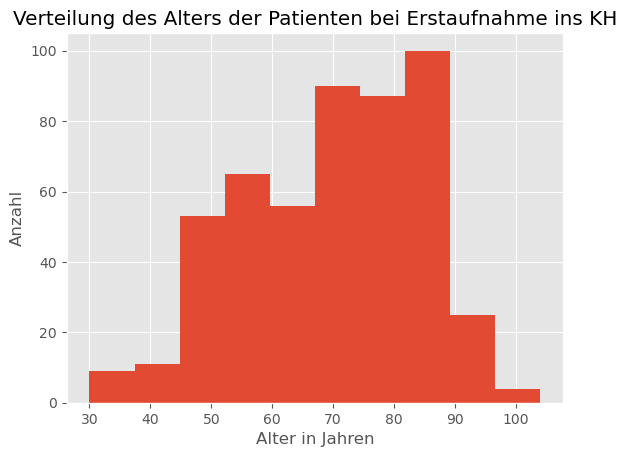

In [67]:
ax = whas500['age'].hist()
ax.set_title('Verteilung des Alters der Patienten bei Erstaufnahme ins KH')
ax.set_ylabel('Anzahl')
ax.set_xlabel('Alter in Jahren')

[Text(0, 0, 'Tot'), Text(1, 0, 'Lebendig')]

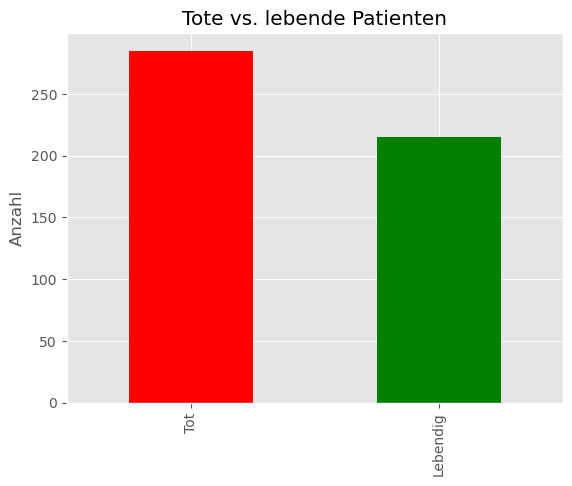

In [68]:
ax = whas500['fstat'].value_counts().plot(kind='bar', color=['red', 'green'])
ax.set_title('Tote vs. lebende Patienten')
ax.set_ylabel('Anzahl')
ax.set_xlabel(None)
ax.set_xticklabels(['Tot', 'Lebendig'])

In [69]:
dead_or_alive = whas500['fstat'].value_counts().to_frame().reset_index()
is_dead = (dead_or_alive['fstat'] == 0)
dead_percentage = (dead_or_alive[is_dead]['count'].values[0] / 500) * 100
alive_percentage = (dead_or_alive[~is_dead]['count'].values[0] / 500) * 100
print(f'{dead_percentage:.2f}% tot vs. {alive_percentage:.2f}% lebendig')


57.00% tot vs. 43.00% lebendig


[]

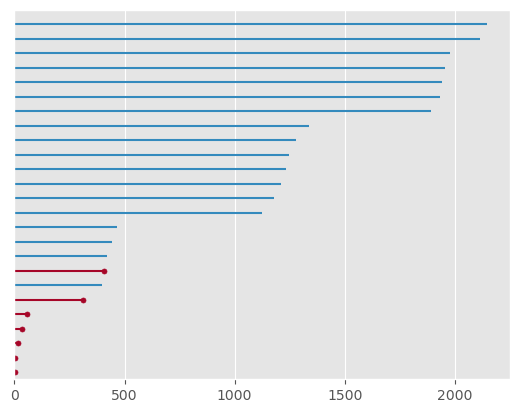

In [70]:

whas25 = whas500.sample(n=25)
lifetimes_ax = plot_lifetimes(whas25['lenfol'], event_observed=whas25['fstat'])
lifetimes_ax.set_yticks([])

## Kaplan-Meier-Schätzer

Der **Kaplan-Meier-Schätzer** (auch Produkt-Grenzwert-Schätzer, kurz: PGS) dient zum Schätzen der Wahrscheinlichkeit, dass bei einem Versuchsobjekt ein bestimmtes Ereignis innerhalb eines Zeitintervalls nicht eintritt. Es handelt sich um eine nichtparametrische Schätzung der Überlebensfunktion im Rahmen der Ereigniszeitanalyse. Die zu Grunde liegenden Daten können rechts-zensiert sein. Diese Methode wurde 1958 von Edward L. Kaplan und Paul Meier entwickelt.

Quelle: https://de.wikipedia.org/wiki/Kaplan-Meier-Sch%C3%A4tzer

In [71]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [72]:
kmf.fit(whas500['lenfol'], event_observed=whas500['fstat'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 500 total observations, 285 right-censored observations>

Text(0.5, 0, 'Tage seit Erstaufnahme im Krankenhaus')

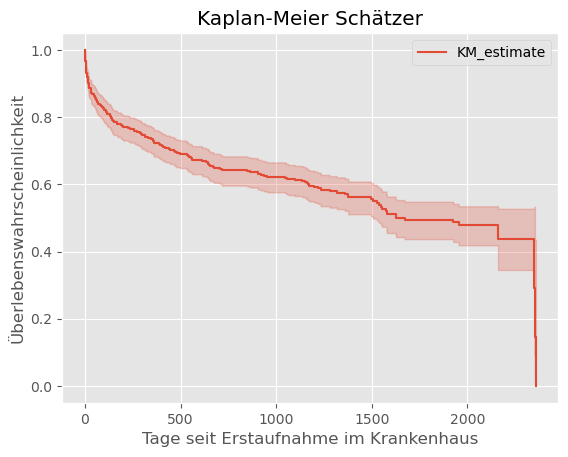

In [73]:
ax = kmf.plot_survival_function()
ax.set_title('Kaplan-Meier Schätzer')
ax.set_ylabel('Überlebenswahrscheinlichkeit')
ax.set_xlabel('Tage seit Erstaufnahme im Krankenhaus')

In [74]:
def median_survival_info(median_survival_in_days):
    years, days_ = divmod(median_survival_in_days, 365)
    months, _ = divmod(days_, 30)
    return f'Median überlebenswahrscheinlichkeit beträgt {kmf.median_survival_time_} Tage (ca. {years} Jahre und {months} Monate)'

In [75]:
print(median_survival_info(kmf.median_survival_time_))

Median überlebenswahrscheinlichkeit beträgt 1627.0 Tage (ca. 4.0 Jahre und 5.0 Monate)


Nun stelle ich mir die Frage (ich bin kein Mediziner), wie hier die Gegenüberstellung aussieht, wenn ich die Einteilung =< 50 Jahre vs. > 50 Jahre vornehme.


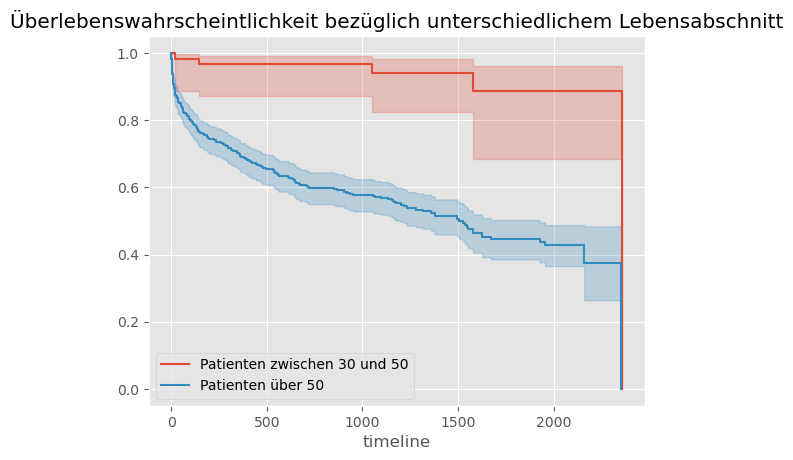

In [76]:
ax = plt.subplot(111)

patients_up_to_fivty = (whas500['age'] <= 50)

kmf.fit(whas500[patients_up_to_fivty]['lenfol'], event_observed=whas500[patients_up_to_fivty]['fstat'], label='Patienten zwischen 30 und 50')
kmf.plot_survival_function(ax=ax)
median_survial_message_up_to_fivty = median_survival_info(kmf.median_survival_time_)

kmf.fit(whas500[~patients_up_to_fivty]['lenfol'], event_observed=whas500[~patients_up_to_fivty]['fstat'], label='Patienten über 50')
kmf.plot_survival_function(ax=ax)
median_survial_message_over_fivty = median_survival_info(kmf.median_survival_time_)

plt.title('Überlebenswahrscheintlichkeit bezüglich unterschiedlichem Lebensabschnitt');

In [77]:
print('Patienten bis 50 Jahre:')
print(median_survial_message_up_to_fivty)
print('\nPatienten über 50 Jahre:')
print(median_survial_message_over_fivty)


Patienten bis 50 Jahre:
Median überlebenswahrscheinlichkeit beträgt 2358.0 Tage (ca. 6.0 Jahre und 5.0 Monate)

Patienten über 50 Jahre:
Median überlebenswahrscheinlichkeit beträgt 1527.0 Tage (ca. 4.0 Jahre und 2.0 Monate)


## Cox-Regression
Die **Cox-Regression** ist eine statistische Methode, mittels welcher der Einfluss von unabhängigne Variablen (Numerisch sowie kategorial) auf die Überlebenswahrscheinlichkeit zu prüfen.

Hilfreiche Links:
- https://de.wikipedia.org/wiki/Cox-Regression
- https://datatab.de/tutorial/cox-regression
- https://www.r-bloggers.com/2016/12/cox-proportional-hazards-model/
- https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

In [78]:
from lifelines import CoxPHFitter

In [79]:
cph = CoxPHFitter()
cph.fit(whas500, duration_col='lenfol', event_col='fstat', formula='bmi + age + gender + year + hr')

<lifelines.CoxPHFitter: fitted with 500 total observations, 285 right-censored observations>

In [80]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 500 total observations, 285 right-censored observations>
             duration col = 'lenfol'
                event col = 'fstat'
      baseline estimation = breslow
   number of observations = 500
number of events observed = 215
   partial log-likelihood = -1139.47
         time fit was run = 2025-09-01 18:40:15 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
bmi       -0.04      0.96      0.02           -0.08           -0.01                0.93                0.99
age        0.06      1.06      0.01            0.05            0.07                1.05                1.07
gender    -0.16      0.85      0.14           -0.44            0.12                0.65                1.13
year       0.26      1.29      0.10            0.06            0.45                1.07                1.57
hr         0.01      1.01      0.00            0.01            0.02                1.01                1.02

           cmp to     z      p  -log2(p)
covariate                               
bmi          0.00 -2.84 <0.005      7.79
age          0.00  8.98 <0.005     61.70
gender       0.00 -1.12   0.26      1.93
year         0.00  2.62   0.01      6.85
hr           0.00  4.23 <0.005     15.40
---
Concordance = 0.75
Partial AIC = 2288.93
log-likelihood ratio test = 175.71 on 5 df
-log2(p) of ll-ratio test = 117.45

### Interpretation der Ergebnisse

Siehe: https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#interpretation

Die folgend aufgeführten Variablen wurden für die Regressionsanalyse gewählt. 

| Variable |	Name	| Description		|        Codes / Values |
|----------|------------|-------------------|-----------------------|
|2		|age		|Age at Hospital Admission		|Years|
|3 		|gender		|Gender 					|0 = Male, 1 = Female|
|4 		|hr		|Initial Heart Rate			|Beats per minute|
|7 		|bmi		|Body Mass Index			 	|kg/m^2|
|15		|year		|Cohort Year			|	1 = 1997, 2 = 1999, 3 = 2001|		

Eine statistische Signifikanz weisen dabei besonders der BMI (bmi), das Alter (age) sowie die Herzfrequenz (hr) auf.



<Axes: xlabel='log(HR) (95% CI)'>

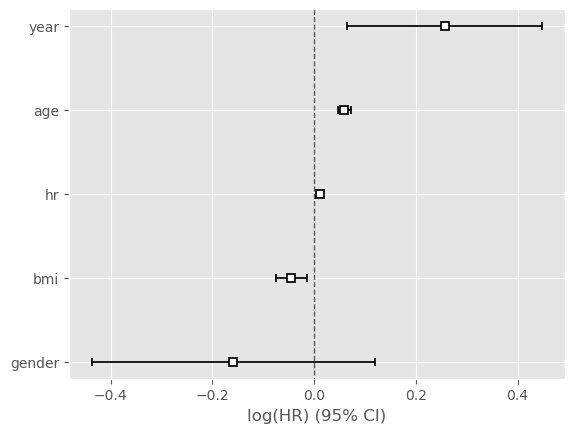

In [81]:
cph.plot()